In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [73]:
bos_house = pd.read_csv('/content/BostonHousing.csv')
bos_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### Renaming columns with more descriptive names.

In [74]:
new_names = {
    "crim": "CrimeRatePerCapita",
    "zn": "ResidentialZoneProp",
    "indus": "NonRetailLandProp",
    "chas": "CharlesRiverProximity",
    "nox": "NitricOxideConcentration",
    "rm": "AvgRoomsPerDwelling",
    "age": "Pre1940OwnerProp",
    "dis": "EmploymentCenterDist",
    "rad": "HighwayAccessIndex",
    "tax": "PropertyTaxRate",
    "ptratio": "PupilTeacherRatio",
    "b": "BlackPopulationIndex",
    "lstat": "LowIncomePopulation",
    "medv": "MedianHomeValue"
}
bos_house.rename(columns=new_names, inplace=True)


In [75]:
bos_house.describe()

,CrimeRatePerCapita,ResidentialZoneProp,NonRetailLandProp,CharlesRiverProximity,NitricOxideConcentration,AvgRoomsPerDwelling,Pre1940OwnerProp,EmploymentCenterDist,HighwayAccessIndex,PropertyTaxRate,PupilTeacherRatio,BlackPopulationIndex,LowIncomePopulation,MedianHomeValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#plotting distributions and visualising clustering
sns.pairplot(bos_house)
plt.show()

The Output was cleared to comply with the submission link's file size constraint. Kindly run the cell to visualise the distributions.

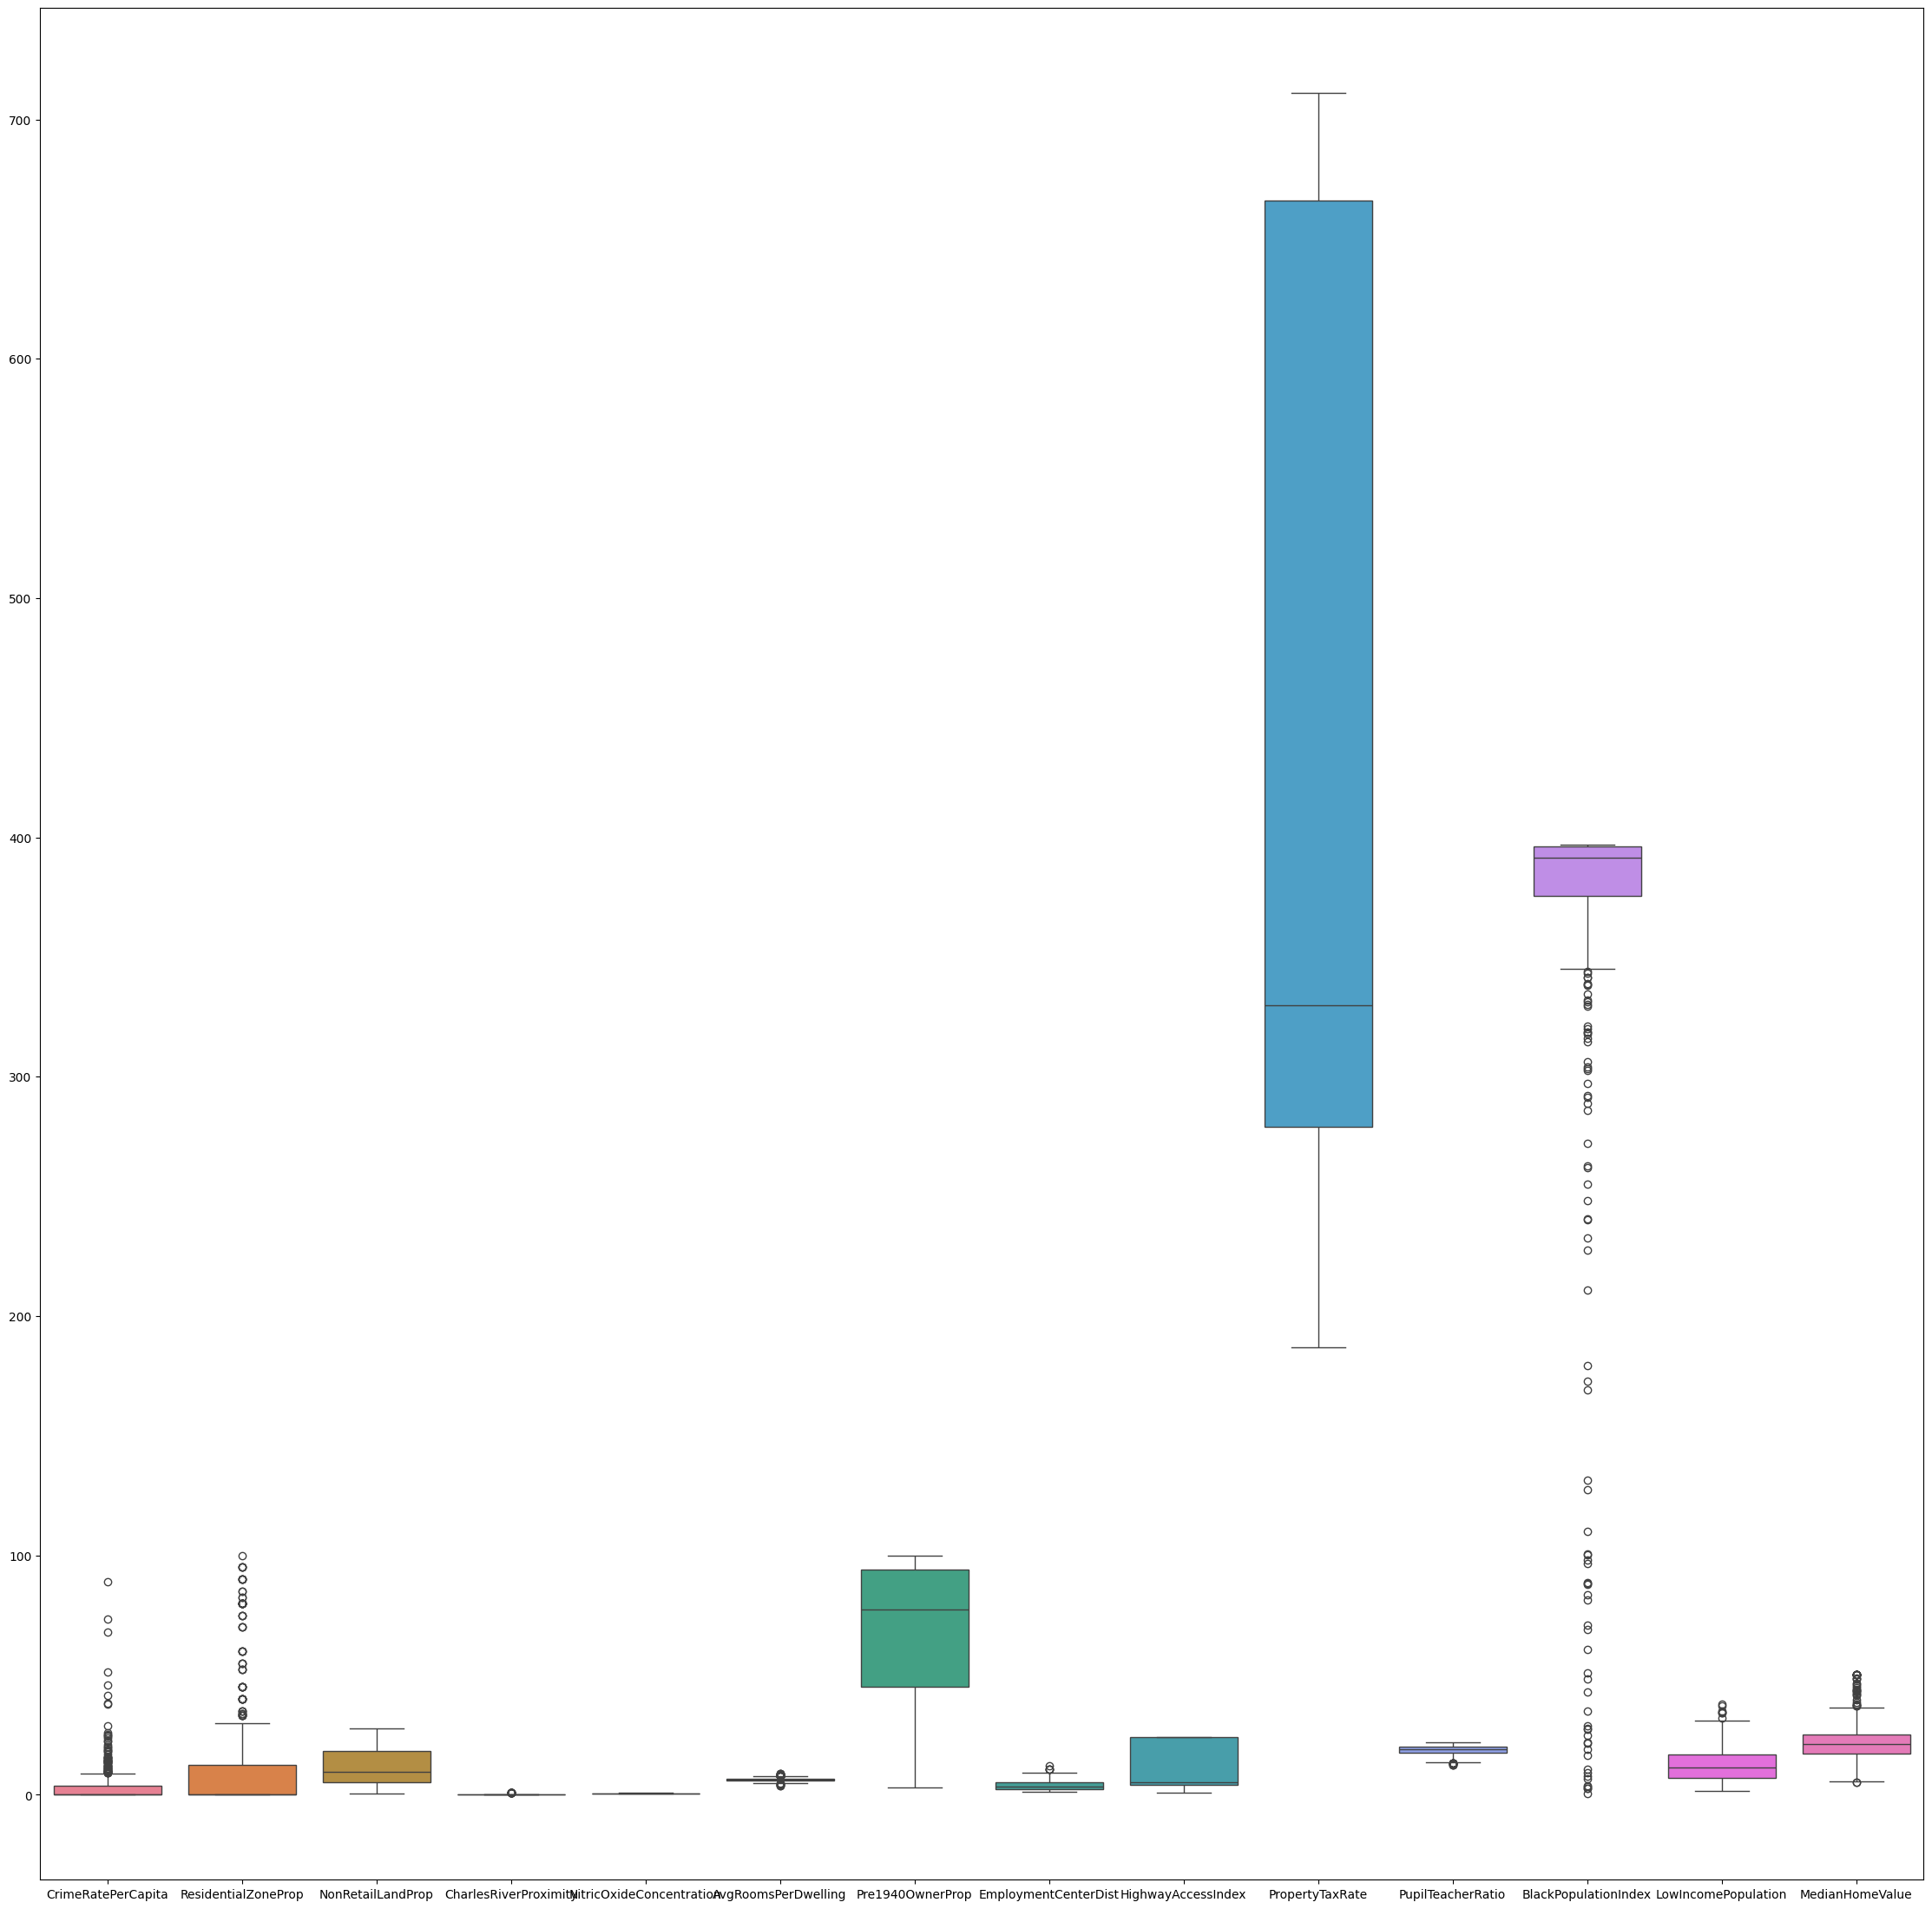

In [77]:
#Statistical visualisation using boxplot
plt.figure(figsize=(28, 28))
sns.boxplot(data=bos_house)
plt.show()

Correlation map to visualise dependence of target feature on other features.

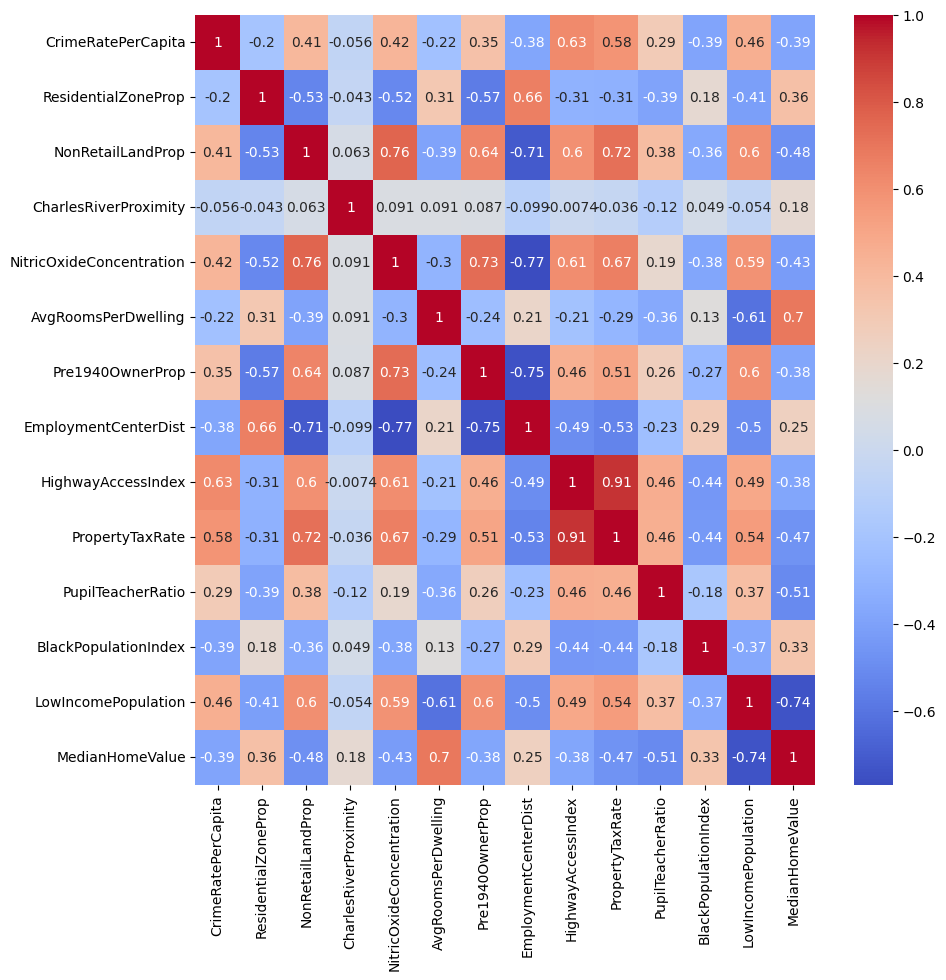

In [78]:
#Correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(bos_house.corr(), annot=True, cmap='coolwarm')
plt.show()

In [79]:
#scaling numerical features
standard_scaler = StandardScaler()
bos_house_subset = bos_house.drop('CharlesRiverProximity', axis=1) #CharlesRiverProximity is categorical, so it is dropped
bos_house_subset_scaled = standard_scaler.fit_transform(bos_house.drop('MedianHomeValue', axis=1)) #Dropping the target feature
bos_house_subset_scaled = pd.DataFrame(bos_house_subset_scaled, columns=bos_house.drop('MedianHomeValue', axis=1).columns)
bos_house_subset_scaled = pd.concat([bos_house_subset_scaled, bos_house['CharlesRiverProximity']], axis=1)

In [80]:
from sklearn.model_selection import KFold

X = bos_house_subset_scaled
y = bos_house['MedianHomeValue']
kf = KFold(n_splits=5, shuffle=True, random_state=42)

model = LinearRegression()
mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  #iloc is for integer location based indexing in dataframes
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse_error = mean_squared_error(y_test, y_pred)
    r_2_score = r2_score(y_test, y_pred)
    mse_scores.append(mse_error)
    r2_scores.append(r_2_score)

    print(f"Mean Squared Error for current fold: {mse_error}")
    print(f"R2 Score for current fold: {r_2_score}")

average_mse = np.mean(mse_scores)
average_r2_score = np.mean(r2_scores)

print(f"Average Cross-Validation MSE: {average_mse}")
print(f"Average Cross-Validation R2: {average_r2_score}")

Mean Squared Error for current fold: 24.29111947497348
R2 Score for current fold: 0.6687594935356325
Mean Squared Error for current fold: 20.867900937377705
R2 Score for current fold: 0.7342547033954026
Mean Squared Error for current fold: 26.395968689280814
R2 Score for current fold: 0.7098660061066442
Mean Squared Error for current fold: 23.401225076162753
R2 Score for current fold: 0.775951677372964
Mean Squared Error for current fold: 22.48676421204842
R2 Score for current fold: 0.687277313717799
Average Cross-Validation MSE: 23.488595677968636
Average Cross-Validation R2: 0.7152218388256883


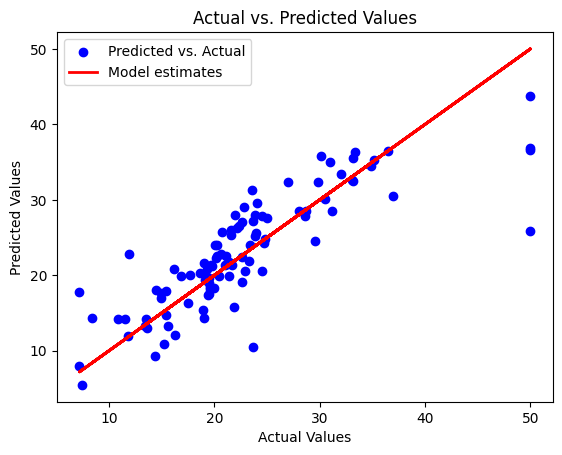

In [81]:
plt.scatter(y_test, y_pred, color="blue", label="Predicted vs. Actual")
plt.plot(y_test, y_test, color="red", linewidth=2, label = "Model estimates")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()


**Model Performance Report**

**1. Introduction**

The purpose of this report is to evaluate the performance of a multiple linear regression model using cross validation with 5 folds, developed to predict Median house value using selected features from the dataset. The quality metrics used for evaluation are Mean Squared Error (MSE) and R-squared (R²). This analysis provides insights into the model’s predictive accuracy and overall utility.

**Dataset Overview**

Number of Observations: 506

Number of Features Used: 13

Preprocessing Steps:
1. Columns were renamed to be more descriptive.
2. Numerical features are normalised and the categorical one that is excluded is added back.

**2. Model Description**

Model Type: Multiple Linear Regression with k-fold cross validation

**Features Selected:**

1. CrimeRatePerCapita: per capita crime rate by town.

2. ResidentialZoneProp: proportion of residential land zoned for lots over 25,000 sq.ft.

3. NonRetailLandProp: proportion of non-retail business acres per town.

4. CharlesRiverProximity: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

5. NitricOxideConcentration: nitric oxides concentration (parts per 10 million)

6. AvgRoomsPerDwelling: average number of rooms per dwelling

7. Pre1940OwnerProp: proportion of owner-occupied units built prior to 1940

8. EmploymentCenterDist: weighted distances to five Boston employment centres

9. HighwayAccessIndex: index of accessibility to radial highways

10. PropertyTaxRate: full-value property-tax rate per $10,000

11. PupilTeacherRatio: pupil-teacher ratio by town

12. BlackPopulationIndex: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13. LowIncomePopulation: % lower status of the population


**3. Performance Metrics**

Mean Squared Error (MSE)

**Value: 23.48**

Definition: MSE measures the average squared difference between predicted and actual values. It indicates the magnitude of prediction errors, with lower values indicating better accuracy.

Interpretation:

The Root Mean Squared Error (RMSE) is approximately: sqrt(23.48)
This implies that, on average, the predictions deviate by ~4.85 units from the actual values in the target variable’s scale.

R-squared (R²)

**Value: 0.7152**

Definition: R² represents the proportion of variance in the target variable explained by the model. It ranges from 0 (no explanatory power) to 1 (perfect explanatory power).

Interpretation:

The model explains approximately 71.52% of the variance in the target variable.







